In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [2]:
df = pd.read_csv("Military_Devices_IoT_Dataset.csv")
df.head(10)

,Device ID,Device Name,Battery Level (%),Temperature (°C),Signal Strength (%),Operational Hours,Maintenance Status,Criticality Level,Threat Detection Alerts,Firmware Vulnerabilities,Environment Type,Service Interval (days),Event Logs,Calibration Status,Device Health
0,ID9785,Body Armor Sensor,25,-8,30,201,No,High,67,5,Forest,52,152,Yes,compromised
1,ID1073,Body Armor Sensor,83,18,99,259,Yes,Medium,19,0,Arctic,133,79,Yes,normal
2,ID7299,Communication Equipment,38,42,23,168,Yes,High,25,3,Forest,113,103,Yes,compromised
3,ID5301,Body Armor Sensor,28,25,87,462,Yes,Low,21,3,Desert,73,48,Yes,normal
4,ID9460,Body Armor Sensor,70,49,56,332,Yes,Low,28,2,Forest,129,23,No,compromised
5,ID5131,Weapon System,12,8,94,351,Yes,Low,87,1,Arctic,131,76,Yes,compromised
6,ID6283,Surveillance Camera,45,12,33,282,Yes,Low,36,3,Desert,158,76,Yes,normal
7,ID4883,Body Armor Sensor,42,42,43,136,Yes,Medium,77,1,Urban,33,17,No,compromised
8,ID3126,Unmanned Ground Vehicle,65,19,68,361,Yes,Low,7,1,Desert,81,28,Yes,normal
9,ID5232,Body Armor Sensor,59,47,66,116,No,High,64,1,Urban,134,136,Yes,compromised


In [3]:
# Drop non-numeric columns (Device ID, Device Name)
X = df.drop(columns=['Device ID', 'Device Name', 'Device Health'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['Device Health']


In [4]:
# Drop non-numeric columns (Device ID, Device Name)
X = df.drop(columns=['Device ID', 'Device Name', 'Device Health'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['Device Health']


In [5]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the shapes of train and test sets
print(X_train.shape, X_test.shape)


(1601, 15) (401, 15)


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of scaled data
print(X_train_scaled[:5])


[[ 1.2045416  -0.96082622 -0.64036122 -0.77571458 -0.31904016 -1.43142553
  -1.21713109  0.13558847  0.60693992 -0.71839995 -0.71241347  1.72701681
  -0.54920489 -0.59249882  0.59153671]
 [-0.69996447  1.3107687  -0.41398374  1.42698528 -0.20287384  0.32288343
   1.47139736  1.33855434 -1.64760953  1.39198228 -0.71241347 -0.57903316
  -0.54920489 -0.59249882  0.59153671]
 [ 0.92680113  1.3107687   1.0801076   0.45288295 -0.31904016  0.32288343
   0.84561918  0.25200452  0.60693992 -0.71839995  1.40367924 -0.57903316
  -0.54920489 -0.59249882  0.59153671]
 [-1.2157682   1.25914154  0.26514868 -1.17062093 -0.47392859 -0.84665588
  -0.70723777 -0.15545167  0.60693992  1.39198228 -0.71241347 -0.57903316
  -0.54920489  1.68776707  0.59153671]
 [-1.17609099  0.63961565 -0.32343275 -1.42511613  2.31406304 -0.84665588
  -0.40593716 -0.6017132   0.60693992 -0.71839995  1.40367924 -0.57903316
  -0.54920489  1.68776707 -1.69051215]]


In [7]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

 compromised       0.99      0.92      0.95       200
      normal       0.93      0.99      0.96       201

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Confusion Matrix:
[[184  16]
 [  2 199]]
Accuracy: 0.9551


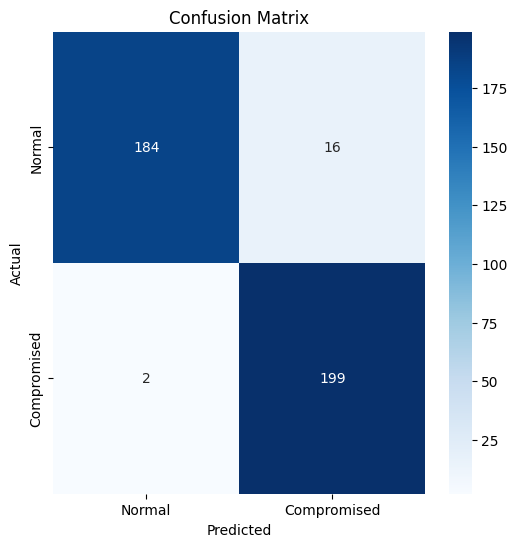

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Compromised'], yticklabels=['Normal', 'Compromised'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
